# AIN311 COURSE PROJECT


## Feature  Desription :
url :https://data.scorenetwork.org/hockey/nhl-shots.html

| Variable                | Description                                                                                                     |
|-------------------------|-----------------------------------------------------------------------------------------------------------------|
| `game_id`               | Unique integer identifier for game shot took place in                                                          |
| `description`           | String detailed description of shot event                                                                      |
| `shot_outcome`          | String denoting the outcome of the shot, either BLOCKED_SHOT (meaning blocked by a non-goalie), GOAL, MISSED_SHOT (shot that missed the net), or SHOT (shot on net that was saved by a goalie) |
| `period`                | Integer value of the game period                                                                               |
| `period_seconds_remaining` | Numeric value of the seconds remaining in the period                                                       |
| `game_seconds_remaining`   | Numeric value of the seconds remaining in the game; negative for overtime periods                         |
| `home_score`            | Integer value of the home team score after the event                                                           |
| `away_score`            | Integer value of the away team score after the event                                                           |
| `home_name`             | String name of the home team                                                                                   |
| `away_name`             | String name of the away team                                                                                   |
| `event_team`            | String defining the team taking the shot                                                                      |
| `event_goalie_name`     | String name of goalie (if in net)                                                                             |
| `empty_net`             | Boolean indicating if the shot was during an empty net situation, TRUE if so but FALSE or NA if not           |
| `event_player_1_name`   | String name of the primary event player                                                                       |
| `event_player_1_type`   | String indicator for the role of event_player_1 (typically the shooter)                                       |
| `event_player_2_name`   | String name of the secondary event player                                                                     |
| `event_player_2_type`   | String indicator for the role of event_player_2 (blocker, assist, or goalie)                                  |
| `strength_code`         | String indicator for game strength: EV (Even), SH (Shorthanded), or PP (Power Play)                           |
| `x_fixed`               | Numeric transformed x-coordinate of event in feet, where the home team always shoots to the right, away team to the left |
| `y_fixed`               | Numeric transformed y-coordinate of event in feet, where the home team always shoots to the right, away team to the left |
| `shot_distance`         | Numeric distance (in feet) to center of net for unblocked shot events                                         |
| `shot_angle`            | Numeric angle (in degrees) to center of net for unblocked shot events                                          |


## 1. Data Preprocessing


###  1.1. Explaratory Data Analysis


In [1]:
#import  libraries
import os 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt



In [2]:

df = pd.read_csv('shots.csv')
df.head()

game_id                                        description  \
0  2021020001   Steven Stamkos Wrist Shot saved by Tristan Jarry   
1  2021020001    Zach Bogosian shot blocked shot by Brock McGinn   
2  2021020001  Brock McGinn Wrist Shot saved by Andrei Vasile...   
3  2021020001        Jan Rutta Wrist Shot saved by Tristan Jarry   
4  2021020001  Danton Heinen Wrist Shot saved by Andrei Vasil...   

   shot_outcome  period  period_seconds_remaining  game_seconds_remaining  \
0          SHOT       1                      1137                    3537   
1  BLOCKED_SHOT       1                      1115                    3515   
2          SHOT       1                      1096                    3496   
3          SHOT       1                      1079                    3479   
4          SHOT       1                      1033                    3433   

   home_score  away_score            home_name            away_name  ...  \
0           0           0  Tampa Bay Lightning  Pittsburgh Penguins  ...   
1           0           0  Tampa Bay Lightning  Pittsburgh Penguins  ...   
2           0           0  Tampa Bay Lightning  Pittsburgh Penguins  ...   
3           0           0  Tampa Bay Lightning  Pittsburgh Penguins  ...   
4           0           0  Tampa Bay Lightning  Pittsburgh Penguins  ...   

  empty_net event_player_1_name event_player_1_type event_player_2_name  \
0       NaN      Steven.Stamkos             Shooter       Tristan.Jarry   
1       NaN       Zach.Bogosian             Shooter        Brock.McGinn   
2       NaN        Brock.McGinn             Shooter  Andrei.Vasilevskiy   
3       NaN           Jan.Rutta             Shooter       Tristan.Jarry   
4       NaN       Danton.Heinen             Shooter  Andrei.Vasilevskiy   

  event_player_2_type strength_code x_fixed y_fixed  shot_distance  shot_angle  
0              Goalie            EV    61.0   -32.0           42.5        48.8  
1             Blocker            EV    60.0   -17.0            NaN         NaN  
2              Goalie            EV   -65.0    19.0           30.6        38.4  
3              Goalie            EV    -8.0   -27.0          100.7        15.6  
4              Goalie            EV   -60.0    -4.0           29.3         7.9  

[5 rows x 22 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160573 entries, 0 to 160572
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   game_id                   160573 non-null  int64  
 1   description               160573 non-null  object 
 2   shot_outcome              160573 non-null  object 
 3   period                    160573 non-null  int64  
 4   period_seconds_remaining  160573 non-null  int64  
 5   game_seconds_remaining    160573 non-null  int64  
 6   home_score                160573 non-null  int64  
 7   away_score                160573 non-null  int64  
 8   home_name                 160573 non-null  object 
 9   away_name                 160573 non-null  object 
 10  event_team                160573 non-null  object 
 11  event_goalie_name         89064 non-null   object 
 12  empty_net                 8712 non-null    object 
 13  event_player_1_name       160573 non-null  o

In [4]:
# Check for empty rows
empty_rows = df.isna().all(axis=1)
df[empty_rows]


Empty DataFrame
Columns: [game_id, description, shot_outcome, period, period_seconds_remaining, game_seconds_remaining, home_score, away_score, home_name, away_name, event_team, event_goalie_name, empty_net, event_player_1_name, event_player_1_type, event_player_2_name, event_player_2_type, strength_code, x_fixed, y_fixed, shot_distance, shot_angle]
Index: []

[0 rows x 22 columns]

No empty rows detected.

In [5]:
df.isnull().sum()

game_id                          0
description                      0
shot_outcome                     0
period                           0
period_seconds_remaining         0
game_seconds_remaining           0
home_score                       0
away_score                       0
home_name                        0
away_name                        0
event_team                       0
event_goalie_name            71509
empty_net                   151861
event_player_1_name              0
event_player_1_type              0
event_player_2_name            374
event_player_2_type            374
strength_code                  306
x_fixed                         13
y_fixed                         13
shot_distance                38224
shot_angle                   38224
dtype: int64

### Investigate features which has missing values

In [6]:
df['event_goalie_name'].value_counts()

event_goalie_name
Andrei.Vasilevskiy    2633
Igor.Shesterkin       2366
Connor.Hellebuyck     2166
Darcy.Kuemper         2151
Juuse.Saros           2118
                      ... 
Magnus.Hellberg         23
Michael.Dipietro        17
Hugo.Alnefelt           10
Michael.McNiven          7
Thomas.Hodges            3
Name: count, Length: 120, dtype: int64

In [7]:
[df['event_goalie_name'].isnull()]

[0         False
 1          True
 2         False
 3         False
 4         False
           ...  
 160568     True
 160569     True
 160570    False
 160571    False
 160572     True
 Name: event_goalie_name, Length: 160573, dtype: bool]

ıf event_golie_name is non that means the shot blocked or mıssed , therefore we can ımpute it by "not goal" 

In [8]:
# Impute missing values in event_goalie_name with "not goal"
df['event_goalie_name'] = df['event_goalie_name'].fillna("not goal")
df['event_goalie_name'].isnull().sum()

0

In [9]:
df['empty_net'].value_counts() 

empty_net
False    8195
True      517
Name: count, dtype: int64

As mentioned in the dataset information, if `empty_net` is `True`, the net was empty. Otherwise, if `empty_net` is either `False` or `NaN`, it indicates the net was not empty.

In [10]:
# Fill NaN values with boolean False, then infer objects to avoid warnings
df['empty_net'] = df['empty_net'].fillna(False)
df['empty_net'] = df['empty_net'].infer_objects()
df['empty_net'] = df['empty_net'].astype(bool)

C:\Users\NURŞAH SATILMIŞ\AppData\Local\Temp\ipykernel_34652\1553471446.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['empty_net'] = df['empty_net'].fillna(False)


In [11]:
df['empty_net'].value_counts()

empty_net
False    160056
True        517
Name: count, dtype: int64

In [12]:
df['event_player_2_name'] = df['event_player_2_name'].fillna('Unknown')


In [13]:
df[df['shot_distance'].isnull()]

game_id                                        description  \
1       2021020001    Zach Bogosian shot blocked shot by Brock McGinn   
6       2021020001     Erik Cernak shot blocked shot by Danton Heinen   
7       2021020001  Evan Rodrigues shot blocked shot by Ryan McDonagh   
11      2021020001       Jan Rutta shot blocked shot by Mark Friedman   
14      2021020001       Kris Letang shot blocked shot by Ross Colton   
...            ...                                                ...   
160565  2021030416   Erik Johnson shot blocked shot by Steven Stamkos   
160567  2021030416   Bowen Byram shot blocked shot by Anthony Cirelli   
160568  2021030416  Mikhail Sergachev shot blocked shot by Erik Jo...   
160569  2021030416  Nikita Kucherov shot blocked shot by Gabriel L...   
160572  2021030416  Nikita Kucherov shot blocked shot by Nathan Ma...   

        shot_outcome  period  period_seconds_remaining  \
1       BLOCKED_SHOT       1                      1115   
6       BLOCKED_SHOT       1                      1009   
7       BLOCKED_SHOT       1                       987   
11      BLOCKED_SHOT       1                       882   
14      BLOCKED_SHOT       1                       847   
...              ...     ...                       ...   
160565  BLOCKED_SHOT       3                       224   
160567  BLOCKED_SHOT       3                       150   
160568  BLOCKED_SHOT       3                       138   
160569  BLOCKED_SHOT       3                       101   
160572  BLOCKED_SHOT       3                        34   

        game_seconds_remaining  home_score  away_score            home_name  \
1                         3515           0           0  Tampa Bay Lightning   
6                         3409           0           0  Tampa Bay Lightning   
7                         3387           0           0  Tampa Bay Lightning   
11                        3282           0           0  Tampa Bay Lightning   
14                        3247           0           0  Tampa Bay Lightning   
...                        ...         ...         ...                  ...   
160565                     224           1           2  Tampa Bay Lightning   
160567                     150           1           2  Tampa Bay Lightning   
160568                     138           1           2  Tampa Bay Lightning   
160569                     101           1           2  Tampa Bay Lightning   
160572                      34           1           2  Tampa Bay Lightning   

                  away_name  ... empty_net event_player_1_name  \
1       Pittsburgh Penguins  ...     False       Zach.Bogosian   
6       Pittsburgh Penguins  ...     False         Erik.Cernak   
7       Pittsburgh Penguins  ...     False      Evan.Rodrigues   
11      Pittsburgh Penguins  ...     False           Jan.Rutta   
14      Pittsburgh Penguins  ...     False         Kris.Letang   
...                     ...  ...       ...                 ...   
160565   Colorado Avalanche  ...     False        Erik.Johnson   
160567   Colorado Avalanche  ...     False         Bowen.Byram   
160568   Colorado Avalanche  ...     False   Mikhail.Sergachev   
160569   Colorado Avalanche  ...     False     Nikita.Kucherov   
160572   Colorado Avalanche  ...     False     Nikita.Kucherov   

        event_player_1_type event_player_2_name event_player_2_type  \
1                   Shooter        Brock.McGinn             Blocker   
6                   Shooter       Danton.Heinen             Blocker   
7                   Shooter       Ryan.McDonagh             Blocker   
11                  Shooter       Mark.Friedman             Blocker   
14                  Shooter         Ross.Colton             Blocker   
...                     ...                 ...                 ...   
160565              Shooter      Steven.Stamkos             Blocker   
160567              Shooter     Anthony.Cirelli             Blocker   
160568              Shooter        Erik.Johnson         

In [14]:
temp =df[df['shot_distance'].isnull()]
temp['shot_outcome'].info()

<class 'pandas.core.series.Series'>
Index: 38224 entries, 1 to 160572
Series name: shot_outcome
Non-Null Count  Dtype 
--------------  ----- 
38224 non-null  object
dtypes: object(1)
memory usage: 597.2+ KB


<Axes: >

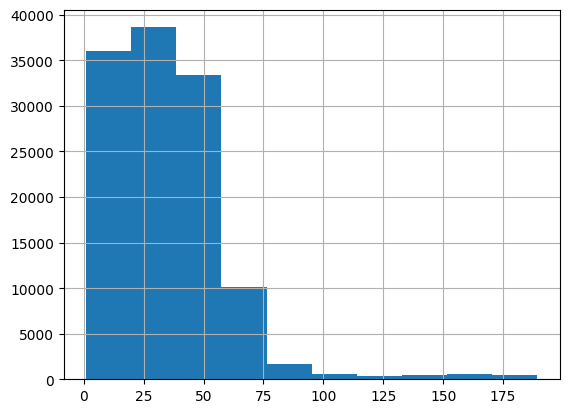

In [15]:
df['shot_distance'].hist()

The output shows that when a shot is blocked, the 'shot_distance' becomes null. We can replace the null values with '-1'. Since the shot distance starts from zero, this substitution should not cause any issues.



In [16]:
df['shot_distance']= df['shot_distance'].fillna(-1)
df['shot_distance'].isnull().sum()

0

In [17]:
df['shot_angle'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 160573 entries, 0 to 160572
Series name: shot_angle
Non-Null Count   Dtype  
--------------   -----  
122349 non-null  float64
dtypes: float64(1)
memory usage: 1.2 MB


In [18]:
df[df['shot_angle'].isnull()]

game_id                                        description  \
1       2021020001    Zach Bogosian shot blocked shot by Brock McGinn   
6       2021020001     Erik Cernak shot blocked shot by Danton Heinen   
7       2021020001  Evan Rodrigues shot blocked shot by Ryan McDonagh   
11      2021020001       Jan Rutta shot blocked shot by Mark Friedman   
14      2021020001       Kris Letang shot blocked shot by Ross Colton   
...            ...                                                ...   
160565  2021030416   Erik Johnson shot blocked shot by Steven Stamkos   
160567  2021030416   Bowen Byram shot blocked shot by Anthony Cirelli   
160568  2021030416  Mikhail Sergachev shot blocked shot by Erik Jo...   
160569  2021030416  Nikita Kucherov shot blocked shot by Gabriel L...   
160572  2021030416  Nikita Kucherov shot blocked shot by Nathan Ma...   

        shot_outcome  period  period_seconds_remaining  \
1       BLOCKED_SHOT       1                      1115   
6       BLOCKED_SHOT       1                      1009   
7       BLOCKED_SHOT       1                       987   
11      BLOCKED_SHOT       1                       882   
14      BLOCKED_SHOT       1                       847   
...              ...     ...                       ...   
160565  BLOCKED_SHOT       3                       224   
160567  BLOCKED_SHOT       3                       150   
160568  BLOCKED_SHOT       3                       138   
160569  BLOCKED_SHOT       3                       101   
160572  BLOCKED_SHOT       3                        34   

        game_seconds_remaining  home_score  away_score            home_name  \
1                         3515           0           0  Tampa Bay Lightning   
6                         3409           0           0  Tampa Bay Lightning   
7                         3387           0           0  Tampa Bay Lightning   
11                        3282           0           0  Tampa Bay Lightning   
14                        3247           0           0  Tampa Bay Lightning   
...                        ...         ...         ...                  ...   
160565                     224           1           2  Tampa Bay Lightning   
160567                     150           1           2  Tampa Bay Lightning   
160568                     138           1           2  Tampa Bay Lightning   
160569                     101           1           2  Tampa Bay Lightning   
160572                      34           1           2  Tampa Bay Lightning   

                  away_name  ... empty_net event_player_1_name  \
1       Pittsburgh Penguins  ...     False       Zach.Bogosian   
6       Pittsburgh Penguins  ...     False         Erik.Cernak   
7       Pittsburgh Penguins  ...     False      Evan.Rodrigues   
11      Pittsburgh Penguins  ...     False           Jan.Rutta   
14      Pittsburgh Penguins  ...     False         Kris.Letang   
...                     ...  ...       ...                 ...   
160565   Colorado Avalanche  ...     False        Erik.Johnson   
160567   Colorado Avalanche  ...     False         Bowen.Byram   
160568   Colorado Avalanche  ...     False   Mikhail.Sergachev   
160569   Colorado Avalanche  ...     False     Nikita.Kucherov   
160572   Colorado Avalanche  ...     False     Nikita.Kucherov   

        event_player_1_type event_player_2_name event_player_2_type  \
1                   Shooter        Brock.McGinn             Blocker   
6                   Shooter       Danton.Heinen             Blocker   
7                   Shooter       Ryan.McDonagh             Blocker   
11                  Shooter       Mark.Friedman             Blocker   
14                  Shooter         Ross.Colton             Blocker   
...                     ...                 ...                 ...   
160565              Shooter      Steven.Stamkos             Blocker   
160567              Shooter     Anthony.Cirelli             Blocker   
160568              Shooter        Erik.Johnson         

In [19]:
temp= df['shot_outcome'][df['event_player_2_name'].notna()]
temp.value_counts()


shot_outcome
SHOT            80648
BLOCKED_SHOT    38224
MISSED_SHOT     32765
GOAL             8936
Name: count, dtype: int64

<Axes: >

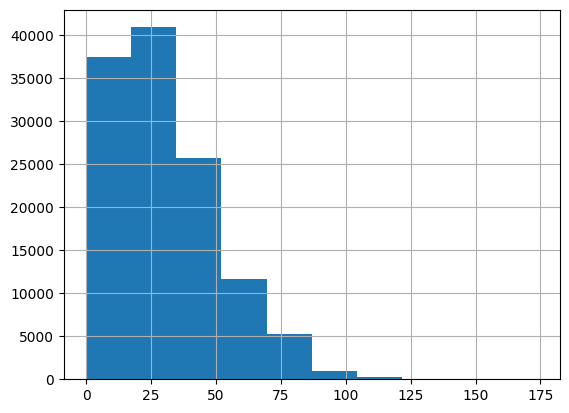

In [20]:
df['shot_angle'].hist()

Shot angle doesn't exist for blocked shot. We can fill it by "-1" to put a mark

In [21]:
df['shot_angle']= df['shot_angle'].fillna(-1)
df['shot_angle'].isnull().sum()

0

In [22]:
df.isnull().sum()

game_id                       0
description                   0
shot_outcome                  0
period                        0
period_seconds_remaining      0
game_seconds_remaining        0
home_score                    0
away_score                    0
home_name                     0
away_name                     0
event_team                    0
event_goalie_name             0
empty_net                     0
event_player_1_name           0
event_player_1_type           0
event_player_2_name           0
event_player_2_type         374
strength_code               306
x_fixed                      13
y_fixed                      13
shot_distance                 0
shot_angle                    0
dtype: int64

In [23]:
df['event_player_2_type'].value_counts()

event_player_2_type
Goalie     81326
Blocker    38224
Unknown    32485
Assist      8164
Name: count, dtype: int64

In [24]:
df['event_player_2_type']=df['event_player_2_type'].fillna(" ")

In [25]:
df['strength_code']=df['strength_code'].fillna(" ")

<Axes: >

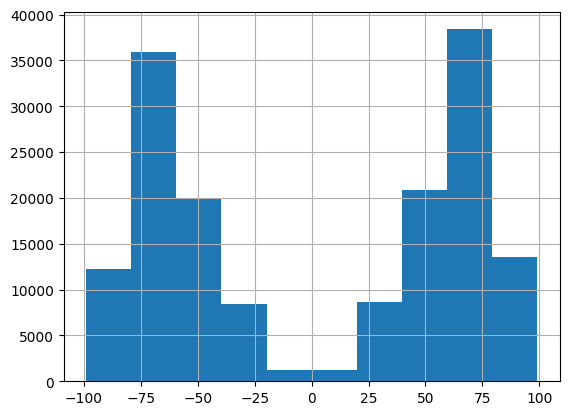

In [26]:
df['x_fixed'].hist()

In [27]:
df['x_fixed'].value_counts()


x_fixed
 80.0    2473
 77.0    2399
 76.0    2338
 78.0    2337
 81.0    2267
         ... 
 97.0      20
-98.0      16
 98.0      14
 99.0       6
-99.0       3
Name: count, Length: 199, dtype: int64

In [41]:
# Convert the 'col' to numeric (float)
df['x_fixed'] = pd.to_numeric(df['x_fixed'], errors='coerce')  # 'coerce' turns invalid parsing into NaN


In [53]:
mean = df['x_fixed'].mean()
df['x_fixed']=df['x_fixed'].fillna(mean)

<Axes: >

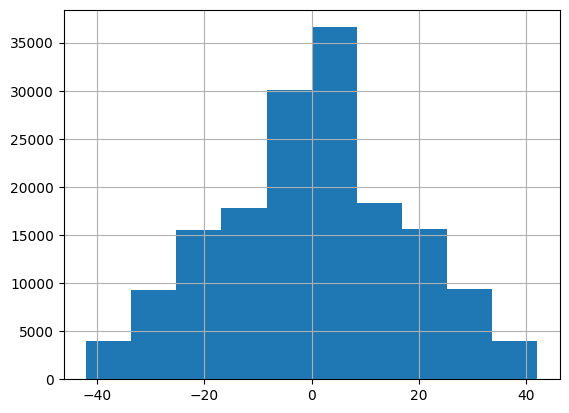

In [30]:
df['y_fixed'].hist()



In [54]:
df['y_fixed'].value_counts()

y_fixed
0.500000    5827
0.511905    5215
0.488095    5154
0.523810    4284
0.476190    4161
            ... 
0.011905      79
0.988095      62
0.000000      18
1.000000      16
0.501290      13
Name: count, Length: 86, dtype: int64

In [39]:
# Convert the 'y_fixed' to numeric (float)
df['y_fixed'] = pd.to_numeric(df['y_fixed'], errors='coerce')  # 'coerce' turns invalid parsing into NaN

# Calculate the mean and fill NaN values with it
mean = df['y_fixed'].mean()  # Note the parentheses here
df['y_fixed'] = df['y_fixed'].fillna(mean)





float64


In [56]:
df.isnull().sum()

game_id                     0
description                 0
shot_outcome                0
period                      0
period_seconds_remaining    0
game_seconds_remaining      0
home_score                  0
away_score                  0
home_name                   0
away_name                   0
event_team                  0
event_goalie_name           0
empty_net                   0
event_player_1_name         0
event_player_1_type         0
event_player_2_name         0
event_player_2_type         0
strength_code               0
x_fixed                     0
y_fixed                     0
shot_distance               0
shot_angle                  0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160573 entries, 0 to 160572
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   game_id                   160573 non-null  int64  
 1   description               160573 non-null  object 
 2   shot_outcome              160573 non-null  object 
 3   period                    160573 non-null  int64  
 4   period_seconds_remaining  160573 non-null  int64  
 5   game_seconds_remaining    160573 non-null  int64  
 6   home_score                160573 non-null  int64  
 7   away_score                160573 non-null  int64  
 8   home_name                 160573 non-null  object 
 9   away_name                 160573 non-null  object 
 10  event_team                160573 non-null  object 
 11  event_goalie_name         160573 non-null  object 
 12  empty_net                 160573 non-null  bool   
 13  event_player_1_name       160573 non-null  o

In [43]:
categorical = df.select_dtypes(include=['object','bool']).columns
numerical = df.select_dtypes(exclude=['object','bool']).columns


In [44]:
categorical

Index(['description', 'shot_outcome', 'home_name', 'away_name', 'event_team',
       'event_goalie_name', 'empty_net', 'event_player_1_name',
       'event_player_1_type', 'event_player_2_name', 'event_player_2_type',
       'strength_code'],
      dtype='object')

array([[<Axes: title={'center': 'game_id'}>,
        <Axes: title={'center': 'period'}>,
        <Axes: title={'center': 'period_seconds_remaining'}>],
       [<Axes: title={'center': 'game_seconds_remaining'}>,
        <Axes: title={'center': 'home_score'}>,
        <Axes: title={'center': 'away_score'}>],
       [<Axes: title={'center': 'x_fixed'}>,
        <Axes: title={'center': 'y_fixed'}>,
        <Axes: title={'center': 'shot_distance'}>],
       [<Axes: title={'center': 'shot_angle'}>, <Axes: >, <Axes: >]],
      dtype=object)

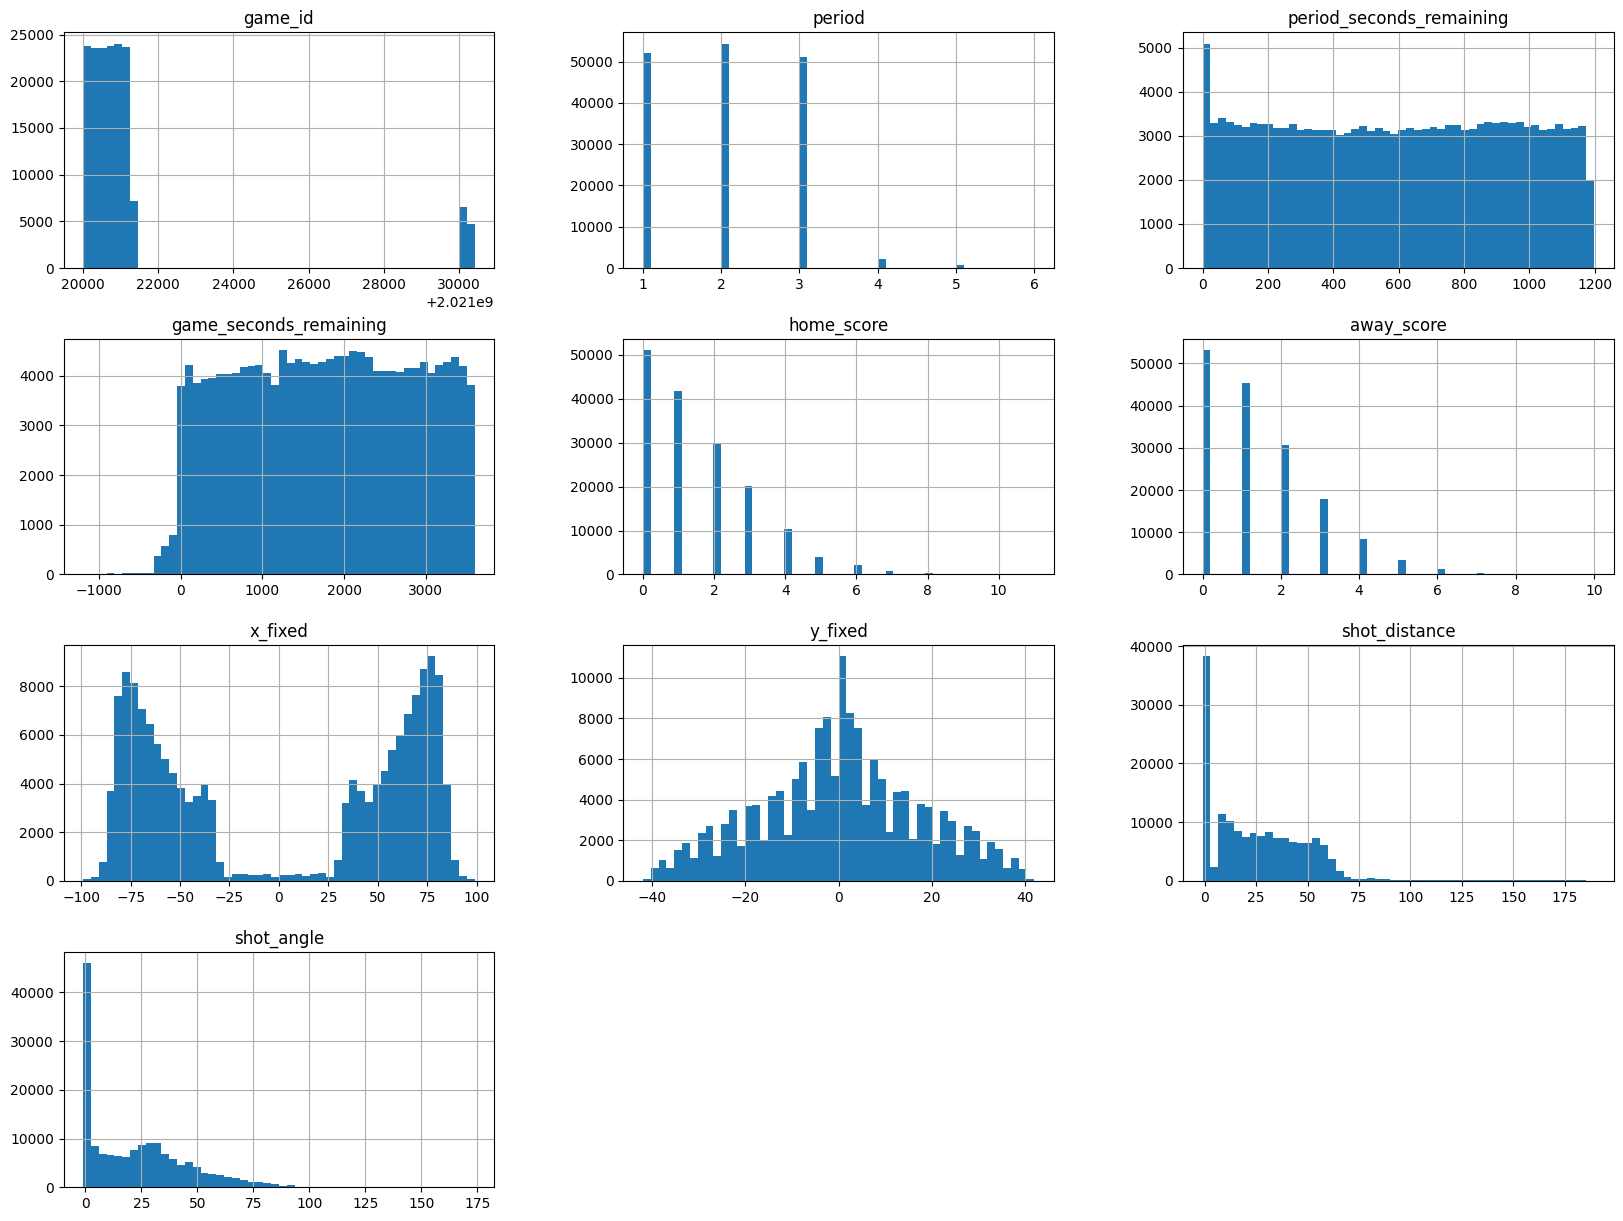

In [45]:
df[numerical].hist(bins=50, figsize=(20,15))

In [46]:
import plotly.express as px

for col in categorical:
    counts = df[col].value_counts().reset_index()
    counts.columns = [col, 'Count']
    
    fig = px.bar(counts, x=col, y='Count', title=f"Distribution of {col}")
    fig.show()


## Label Encoding


In [57]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in categorical:
    df[col] = encoder.fit_transform(df[col])

In [58]:
#normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[numerical] = scaler.fit_transform(df[numerical])

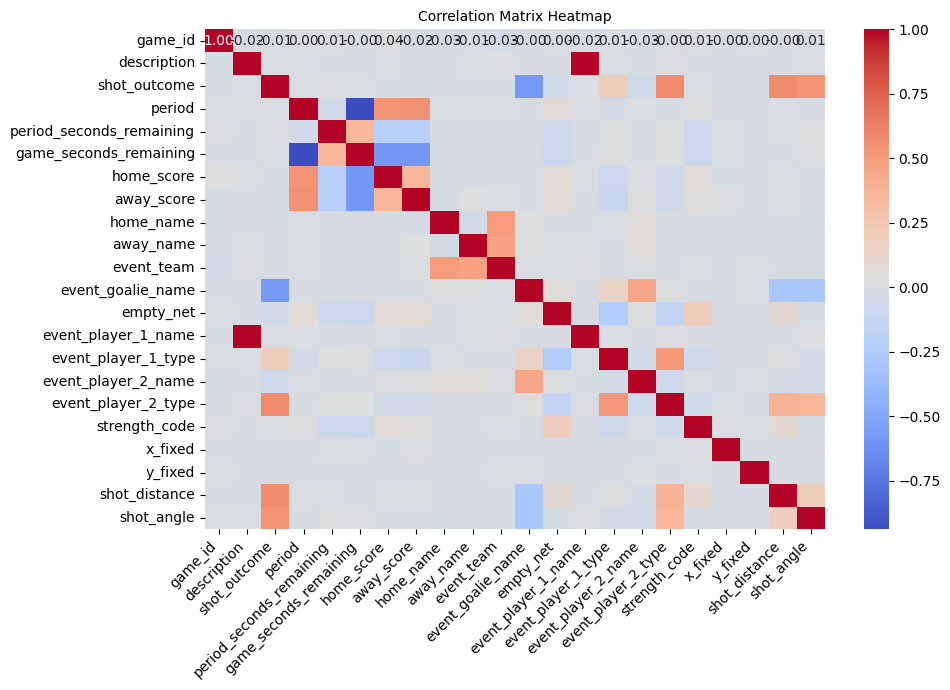

In [59]:

import seaborn as sns

corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 7))  # Adjust figure size as needed
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Add title for better readability
plt.title("Correlation Matrix Heatmap", fontsize=10)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.yticks(rotation=0)  # Ensure y-axis labels are horizontal
plt.tight_layout()  # Avoid clipping labels
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('shot_outcome',axis=1)
y = df['shot_outcome']

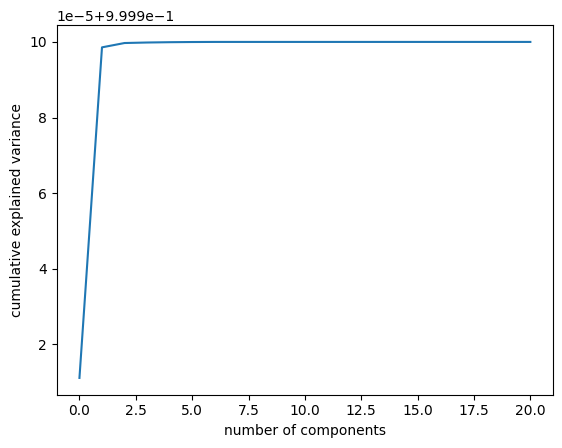

In [66]:
#PCA plot cumulative variance 
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [67]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_pca,y, test_size=0.2, random_state=42)

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.8374591312470808


In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      7697
           1       0.73      0.40      0.51      1822
           2       0.81      0.72      0.76      6633
           3       0.88      0.92      0.90     15963

    accuracy                           0.84     32115
   macro avg       0.80      0.73      0.75     32115
weighted avg       0.83      0.84      0.83     32115



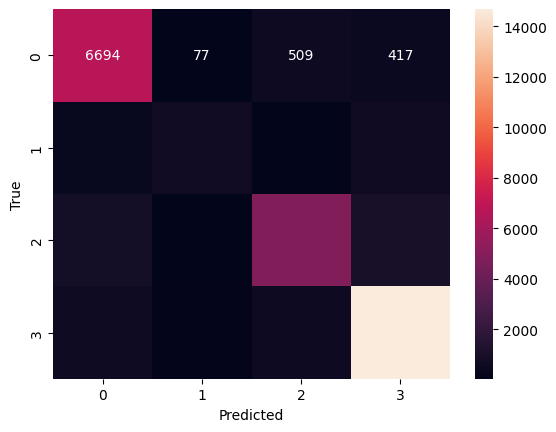

In [74]:
#model evaluation 
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


#svm

In [76]:
# naive bayes classifier for multiclass clasiification 
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
#evaluate
y_pred = nb.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.724396699361669


In [77]:
#tune nb model
from sklearn.model_selection import GridSearchCV
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
nb_cv = GridSearchCV(nb, param_grid, cv=5)
nb_cv.fit(X_train, y_train)
print('Optimal var_smoothing:', nb_cv.best_params_['var_smoothing'])


Optimal var_smoothing: 1e-09


In [78]:
#built model by best params
nb_cv = GaussianNB(var_smoothing=nb_cv.best_params_['var_smoothing'])
nb_cv.fit(X_train, y_train)
#evaluate model 
y_pred = nb_cv.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.724396699361669


## SVC

In [ ]:
#Random Forest 
from sklearn.ensemble import Random
rf = RandomForest
rf.fit(X_train, y_train)
#evaluate model 
y_pred = rf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
#
